In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import helpers
%matplotlib inline 

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,7)


In [2]:
arr_simple = np.load("data/AA66266AA.npy",allow_pickle=True)
arr_double = np.load("data/AA662266AA.npy",allow_pickle=True)

In [3]:
print("Simple polymer shape ", arr_simple.shape, arr_simple[0].shape)
print("Double polymer shape ", arr_double.shape, arr_double[0].shape)

Simple polymer shape  (22039,) (425, 2)
Double polymer shape  (50957,) (419, 2)


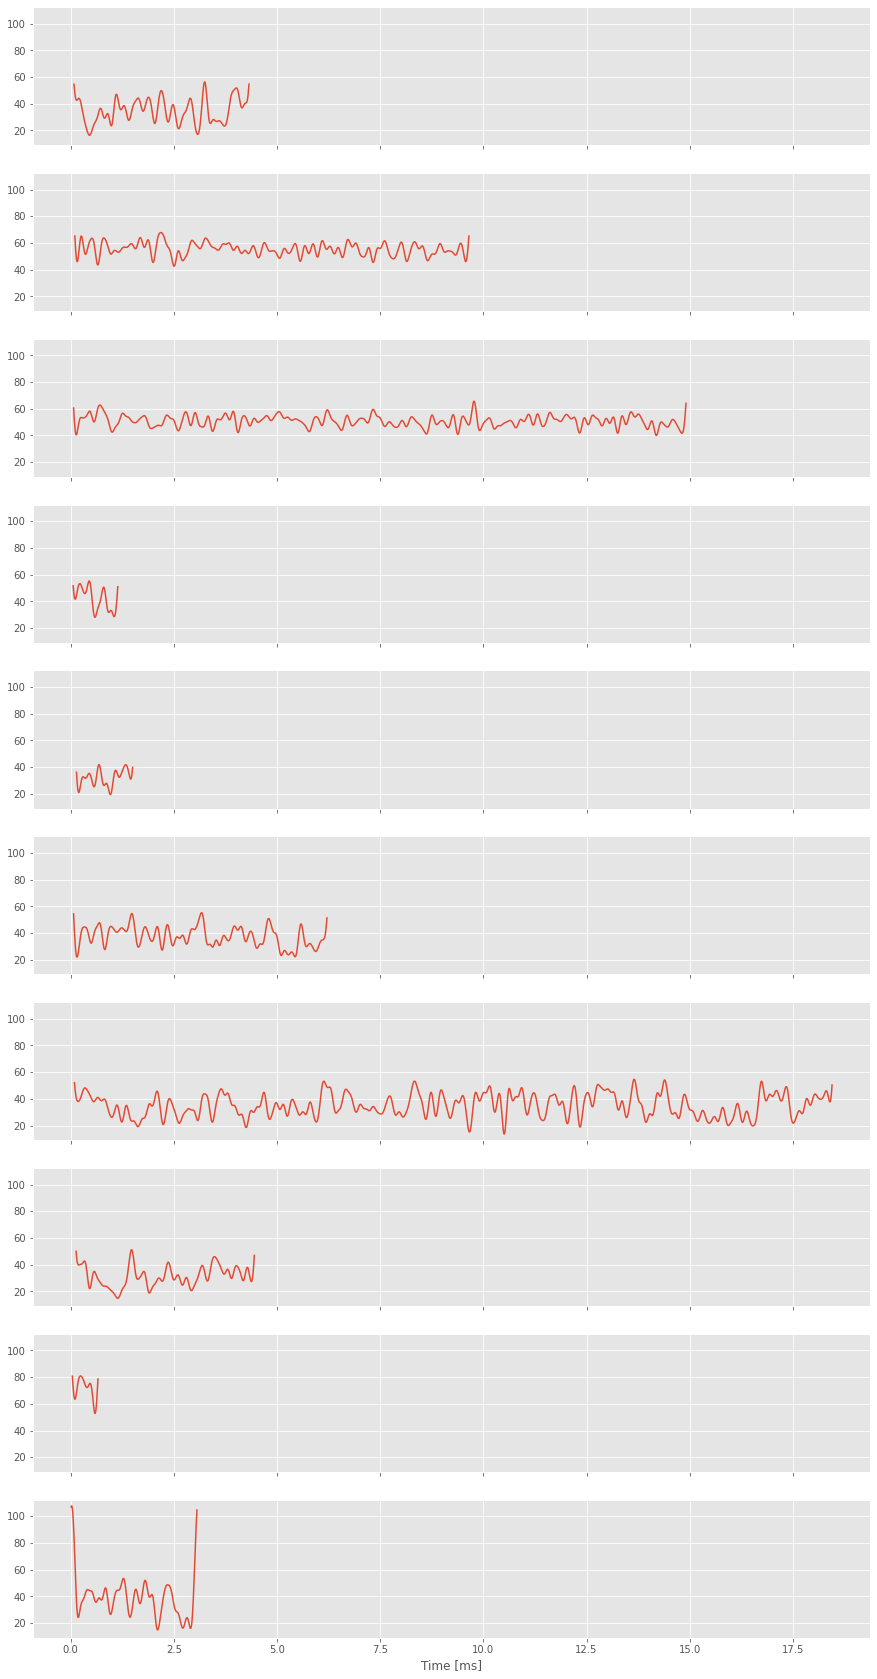

In [4]:
k = 10
fig, axes = plt.subplots(k,1, figsize=(15,30), sharex=True, sharey=True)

for i in range(k):
    obs = arr_simple[i]
    time = obs[:,0]
    current = obs[:,1]

    g= sns.lineplot(x=time,y=current, ax=axes[i])
    g.set_xlabel("Time [ms]")

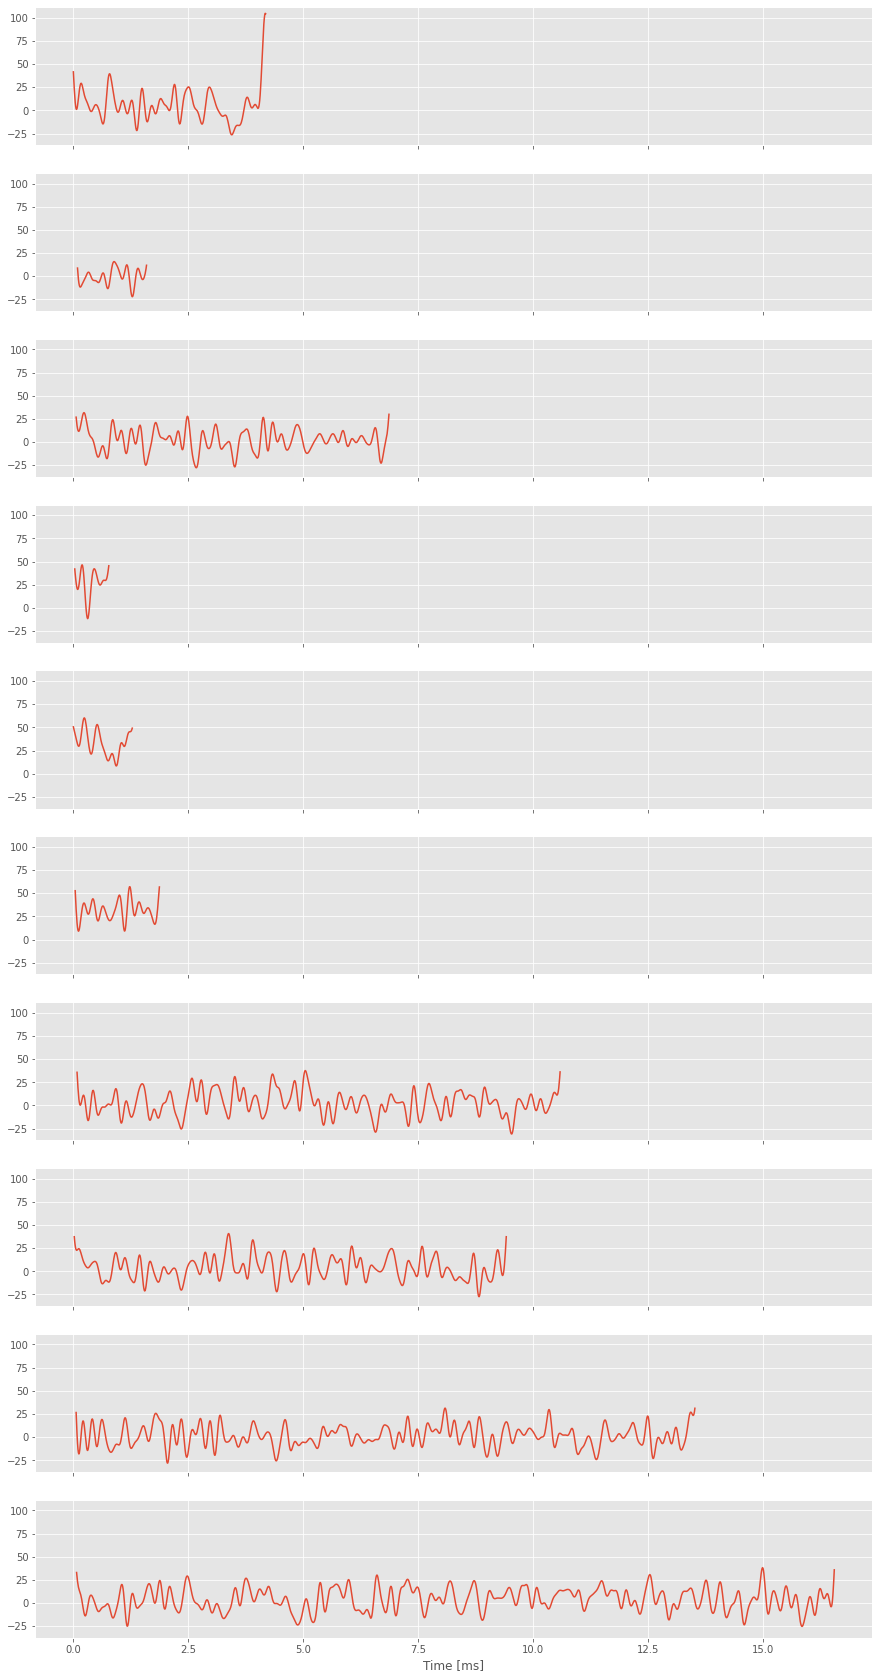

In [5]:
k = 10
fig, axes = plt.subplots(k,1, figsize=(15,30), sharex=True, sharey=True)

for i in range(k):
    obs = arr_double[i]
    time = obs[:,0]
    current = obs[:,1]

    g= sns.lineplot(x=time,y=current, ax=axes[i])
    g.set_xlabel("Time [ms]")

In [6]:
arr_simple[0][-1,0]

4.32

In [7]:
def count_extremums(current):
    if len(current)<3:
        return 0
    increasing = current[0]<current[1]
    tmp=current[0]
    counter = 0
    values=[]
    for i in current[1:]:
        if increasing and i<tmp:
            increasing = False
            counter +=1
            values.append(i)
        elif not increasing and i>tmp:
            increasing=True
            counter+=1
            values.append(i)

        tmp=i
    return counter

In [8]:
def extract_features(row):
    length=row[-1,0]
    current=row[:,1]
    mean_current=np.mean(current)
    max_current=np.max(current)
    min_current=np.min(current)
    extremum_count=count_extremums(current)
    return (length, mean_current, max_current, min_current, extremum_count)
    


In [9]:
length, mean_current, max_current, min_current, extremum_count=extract_features(arr_simple[0])

In [10]:
def get_extracted_features(arr, plot=False):
    lengths=[]
    means=[]
    maxs=[]
    mins=[]
    extremum_counts=[]
    
    for row in arr:
        length, mean_current, max_current, min_current, extremum_count=extract_features(row)
        lengths.append(length)
        means.append(mean_current)
        maxs.append(max_current)
        mins.append(min_current)
        extremum_counts.append(extremum_count)
    if plot:
        fig, axes = plt.subplots(5,1, figsize=(30,30))
        sns.histplot(lengths, ax=axes[0]).set_title("lengths")
        sns.histplot(means, ax=axes[1]).set_title("means")
        sns.histplot(maxs, ax=axes[2]).set_title("maxs")
        sns.histplot(mins, ax=axes[3]).set_title("mins")
        sns.histplot(extremum_counts, ax=axes[4]).set_title("extremum counts")
    return np.array([np.array(lengths),np.array(means),np.array(maxs),np.array(mins),np.array(extremum_counts)])


In [ ]:
def normalize(x):
    return (x-np.mean(x))/np.std(x)

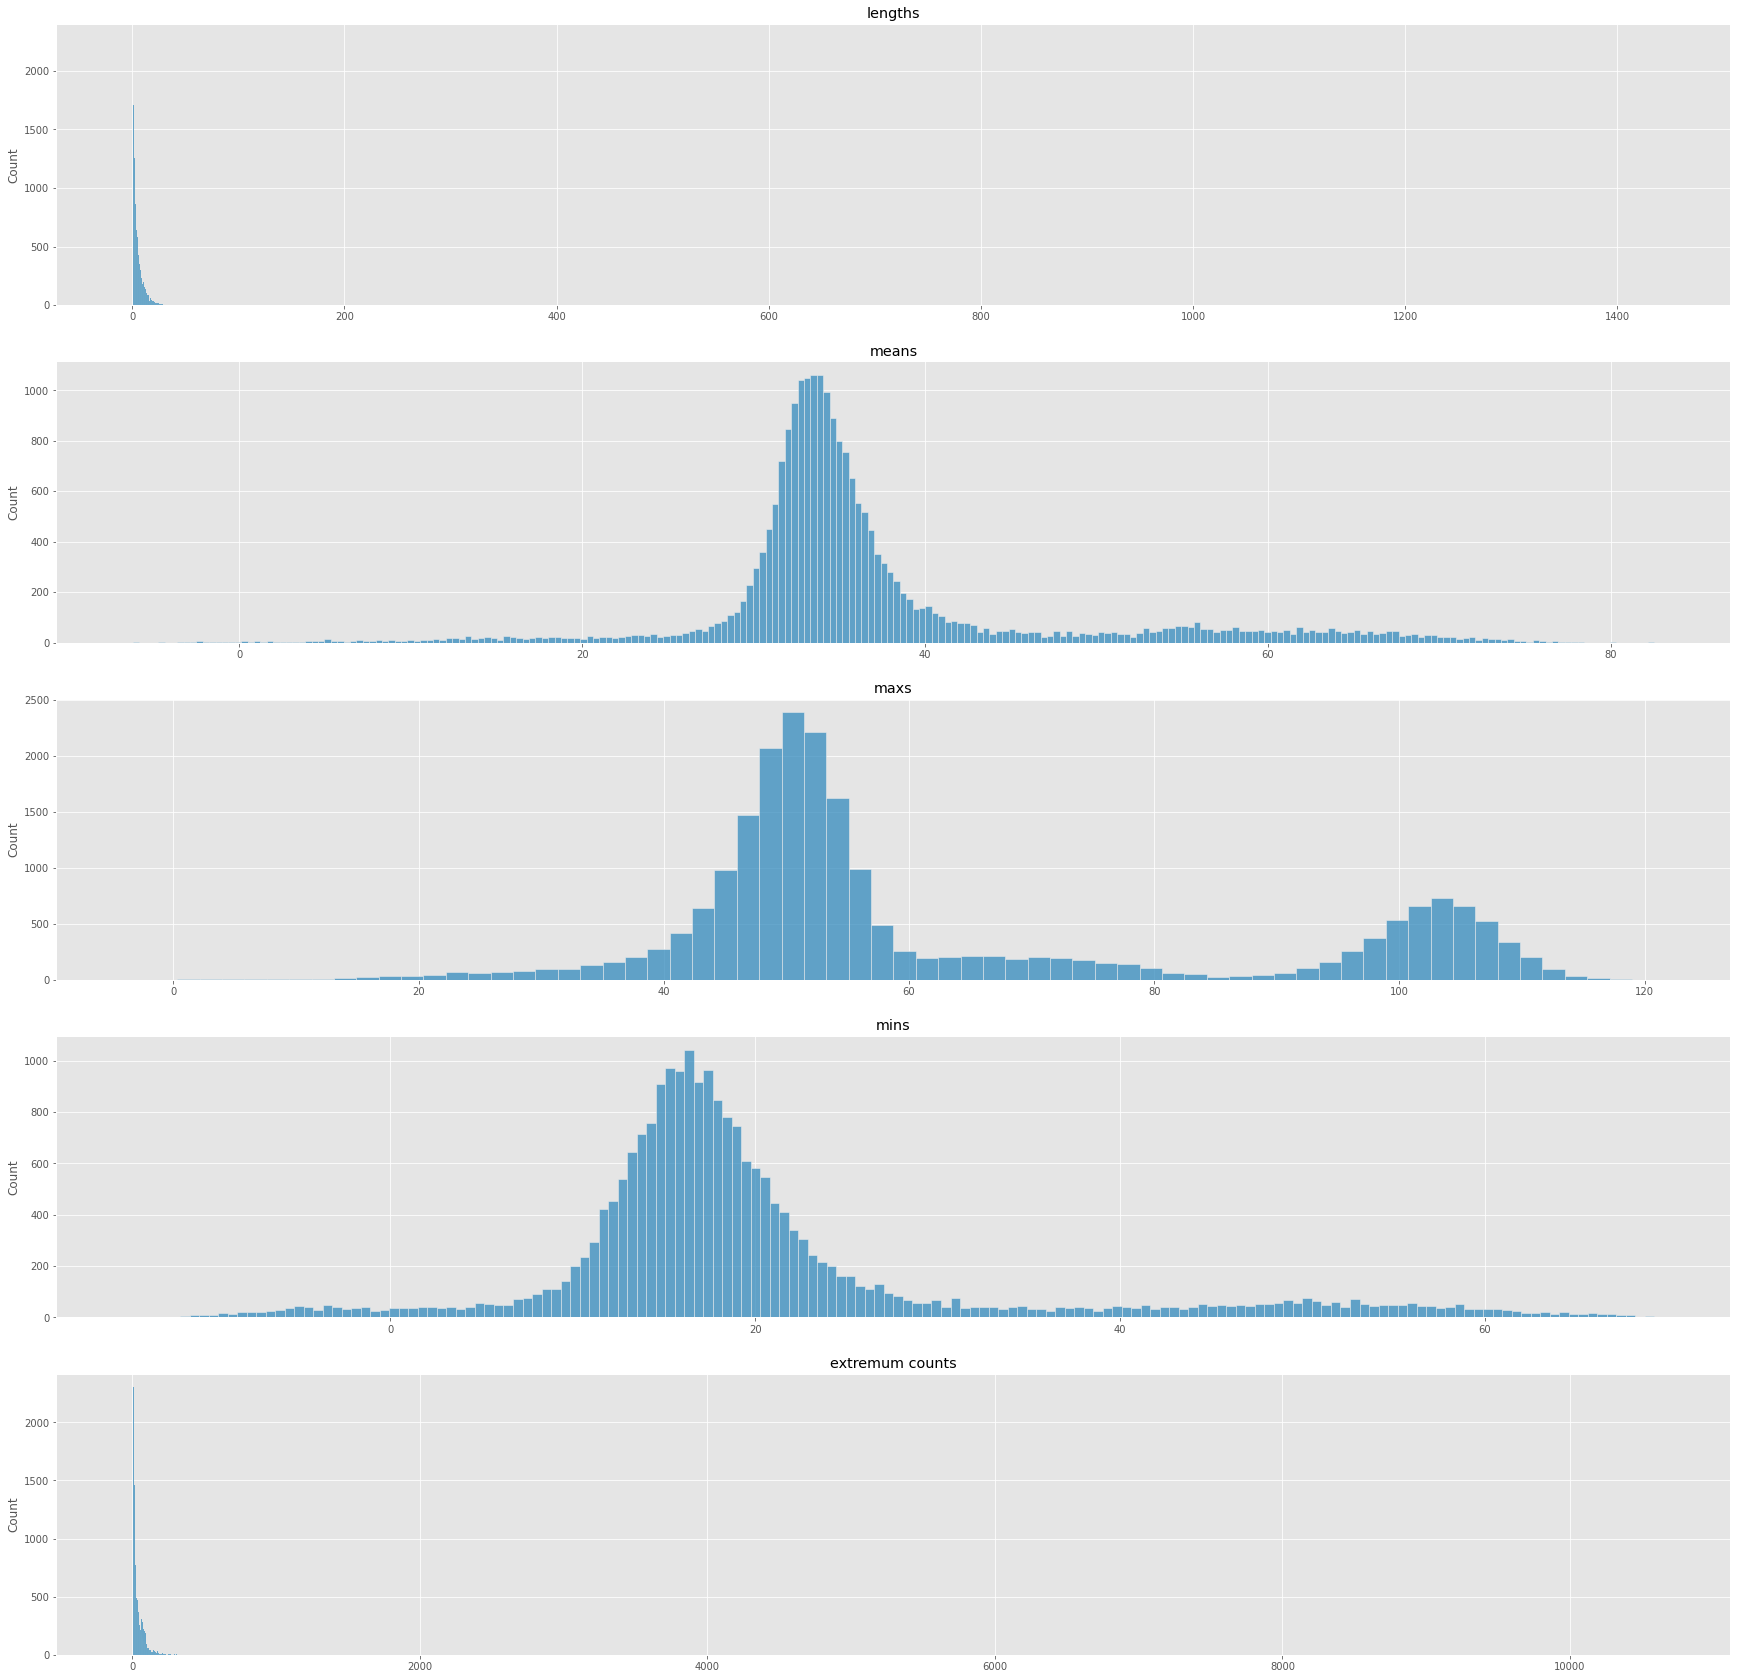

In [11]:
simpleX=get_extracted_features(arr_simple, plot=True).T

In [12]:
df_simple=pd.DataFrame(simpleX, columns=["length", "mean", "max", "min", "extremum"])

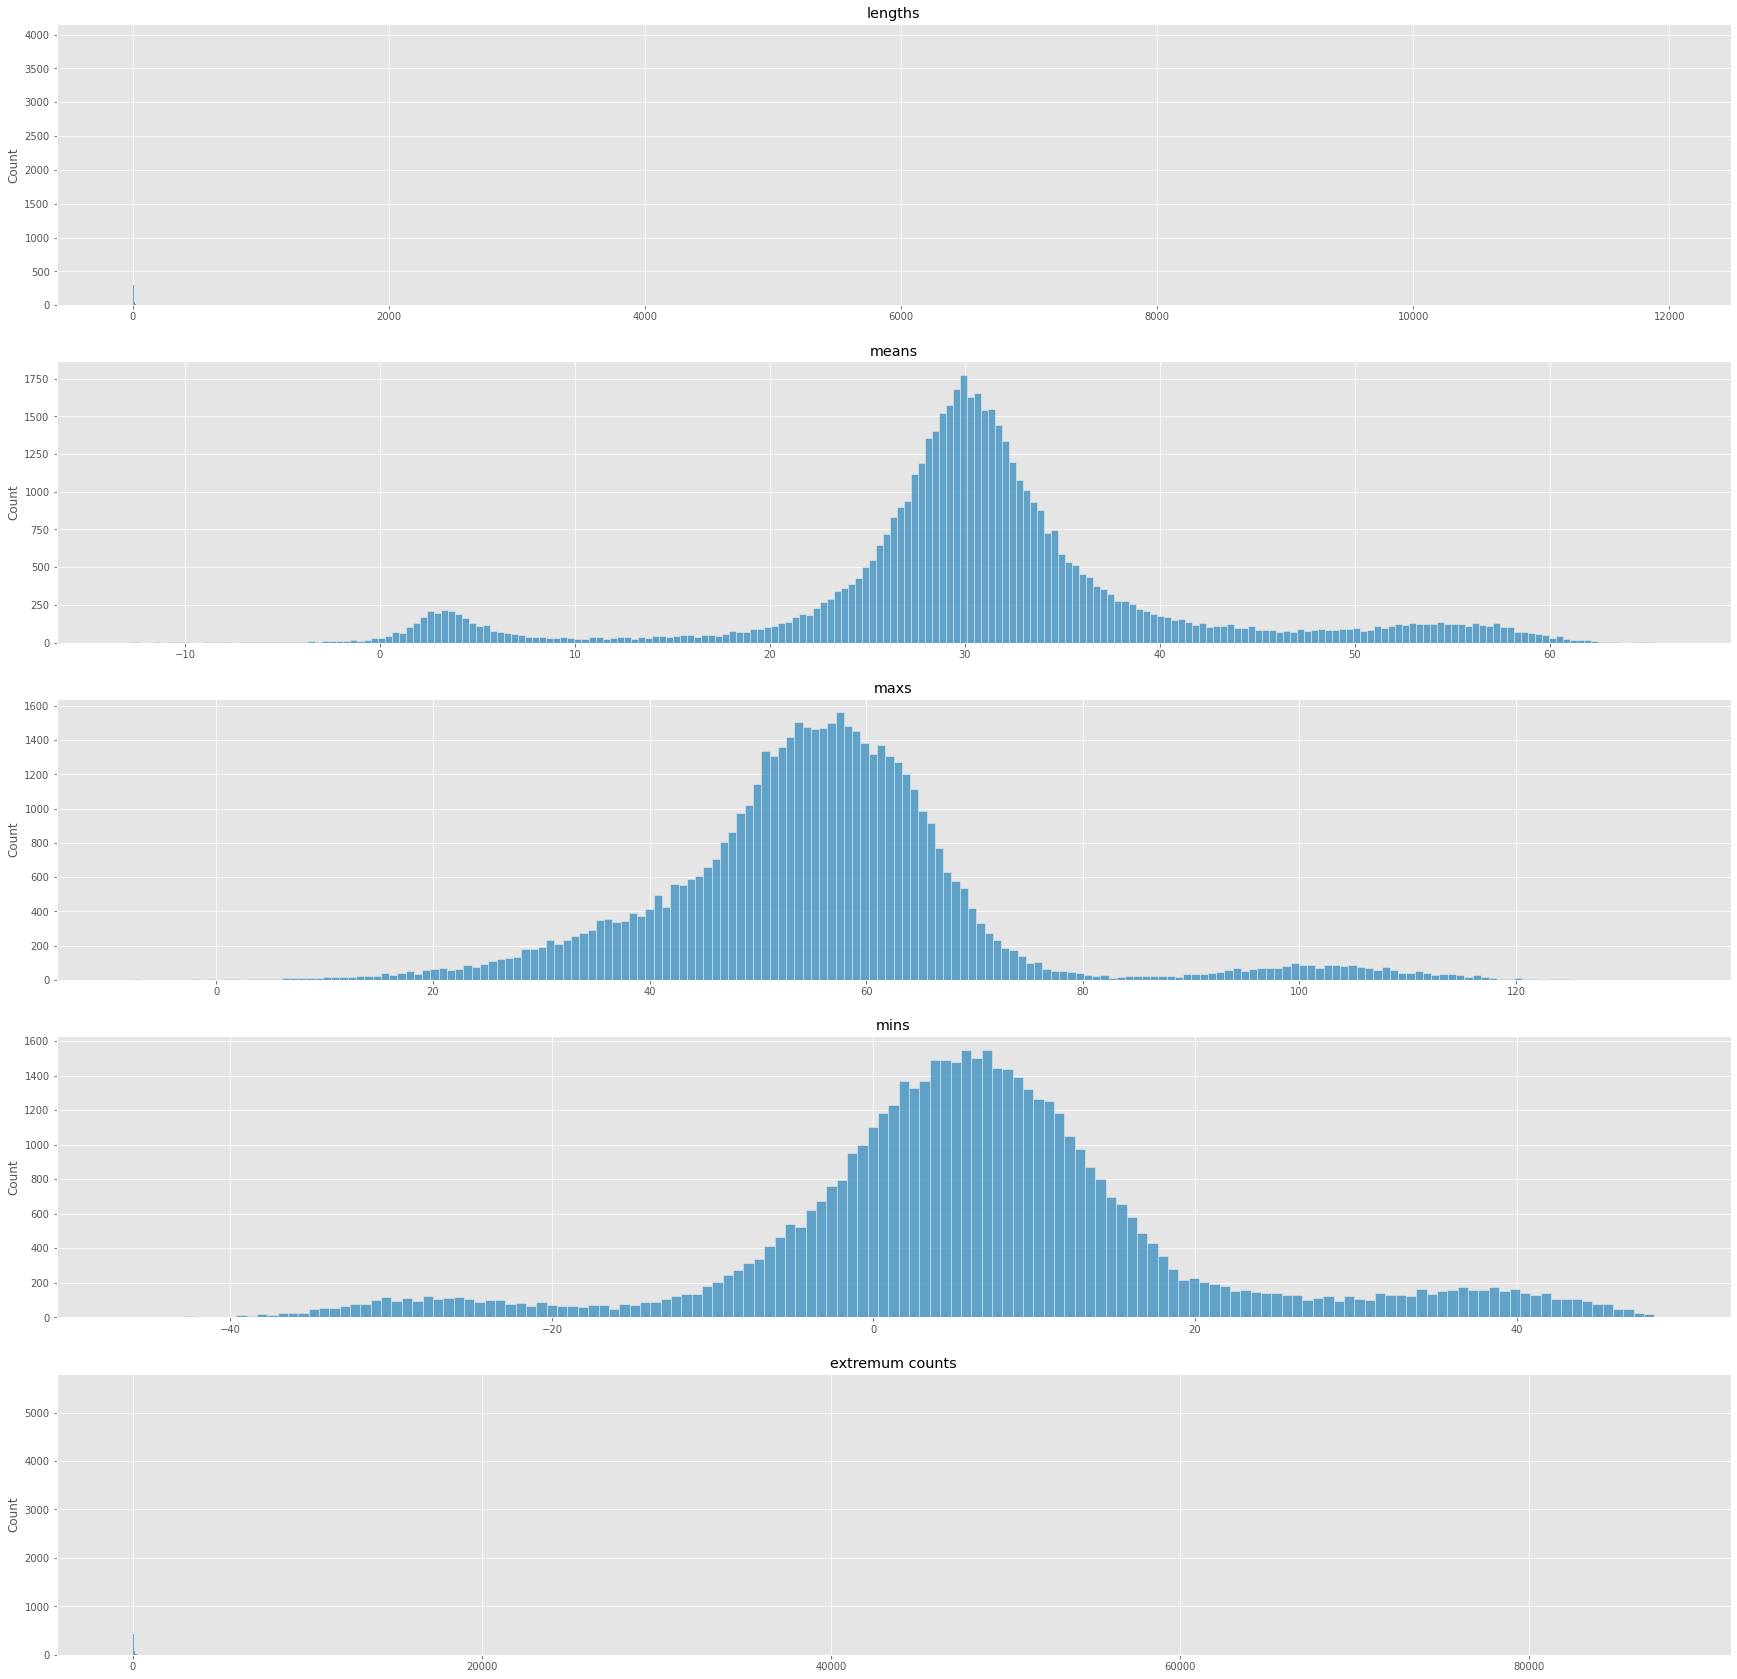

In [14]:
doubleX=get_extracted_features(arr_double, plot=True).T

In [16]:
df_double=pd.DataFrame(doubleX, columns=["length", "mean", "max", "min", "extremum"])

In [18]:
df_simple.describe()

,length,mean,max,min,extremum
count,22039.000000,22039.000000,22039.000000,22039.000000,22039.000000
mean,5.133861,36.880636,62.568330,20.211709,37.453560
std,12.723698,10.550761,23.374478,12.517944,93.952225
min,0.180000,-6.224567,-3.326128,-14.125677,1.000000
25%,1.260000,32.276848,48.229324,14.225583,9.000000
50%,3.040000,34.247925,52.659233,17.265463,21.000000
75%,6.490000,37.525126,74.093597,21.563379,47.000000
max,1434.890015,82.529396,120.786629,69.284660,10587.000000


In [17]:
df_double.describe()

,length,mean,max,min,extremum
count,50957.000000,50957.000000,50957.000000,50957.000000,50957.000000
mean,4.803236,30.697007,55.815615,6.511179,35.088114
std,76.289583,10.365965,15.208856,13.591141,561.095488
min,0.180000,-12.683914,-7.722728,-46.078430,1.000000
25%,0.960000,27.299438,48.294945,0.185759,7.000000
50%,2.030000,30.400698,55.686272,6.107318,15.000000
75%,4.460000,33.977844,62.497509,12.147684,33.000000
max,11883.219727,65.362762,132.776047,48.582317,87189.000000


In [15]:
doubleX.shape

(50957, 5)

In [21]:
X=np.concatenate((simpleX, doubleX))
Y=np.concatenate((np.zeros(len(simpleX)),np.ones(len(doubleX))))

In [32]:
X.shape
Y.shape

(72996,)

In [19]:
from sklearn import svm, model_selection

In [20]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,Y, train_size=0.7, random_state=3)

clf = svm.SVC()
clf.fit(X_train, y_train)

NameError: name 'X' is not defined

In [35]:
clf.score(X_test,y_test)

0.8338736928626878

In [22]:
import torch.nn as nn
import torch 
from torch.autograd import Variable 

In [23]:
X_chunks=[]
Y_chunks=[]
X=np.concatenate((arr_simple,arr_double))
print("Single bulky shape: {} \n Double bulky shape: {}".format(arr_simple.shape, arr_double.shape))
print(X.shape)
for label, row in zip(Y,X):
    for y,x in helpers.split_in_k(label,row,6):
        Y_chunks.append(y)
        X_chunks.append(extract_features(x))

Single bulky shape: (22039,) 
 Double bulky shape: (50957,)
(72996,)


In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

2021-11-26 10:17:58.152206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-26 10:17:58.152230: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [25]:
model = Sequential()

2021-11-26 10:17:59.960522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 10:17:59.961691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-26 10:17:59.961816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-26 10:17:59.961901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-26 10:17:59.962004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [26]:
embed_dim = 128
lstm_out = 1
batch_size= 32

In [27]:
model.add(LSTM(lstm_out, recurrent_dropout = 0.2, dropout = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

X_final=np.array(X_chunks).reshape((len(X),-1,5)).astype("float32")
Y_final=np.array(X_chunks).reshape((len(Y),-1)).astype("float32")

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.20, random_state = 36)

model.fit(X_train, Y_train, batch_size =batch_size,  verbose = 5)
print(model.summary())

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [45]:
Y_final = Variable(torch.Tensor(np.array(Y_chunks).reshape((len(Y),-1))))
X_final = Variable(torch.Tensor(np.array(X_chunks).reshape((len(X),-1,5))))

In [52]:
Y_final.shape
X_final.shape

torch.Size([72996, 6, 5])

In [34]:
nn.LSTM(6,5,1)

LSTM(6, 5)

In [64]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        print("X ",x[0,0].shape)
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out
 

In [65]:
lstm1 = LSTM1(1, 5, 2, 1, X_final.shape[1]) #our lstm class 

In [66]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=0.01) 

In [67]:
for epoch in range(1000):
  outputs = lstm1.forward(Variable(torch.Tensor(X_chunks))) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, Variable(torch.Tensor(Y_chunks)))
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

X  torch.Size([])


RuntimeError: input must have 3 dimensions, got 2